In [1]:
## the dataset is taken from kaggle 
## for the computational purposes the subset of images have been taken 
## total 4000 images with 2000 for training 1000 for validation and 1000 for testing 
## of all the train test and validaton the proportion is 1:1 for both dogs and cats

In [1]:
train_dir=r'C:/Users/ATHCHAND/OneDrive - Capgemini/Documents/azure sentinel_anamoly detection/cats dogs image classification/train'
test_dir=r'C:/Users/ATHCHAND/OneDrive - Capgemini/Documents/azure sentinel_anamoly detection/cats dogs image classification/test'
validation_dir=r'C:/Users/ATHCHAND/OneDrive - Capgemini/Documents/azure sentinel_anamoly detection/cats dogs image classification/validation'


In [2]:
import tensorflow as tf 
from tensorflow import keras 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data preprocessing 

In [4]:
## Step1: for data preprocessing we need to first read the picture files 
## Step2: Then we convert the JPEG images into RBG images 
## Step3: We then convert it into appropriate tensors and then into pixels betn 0-1 (by scaling it down with a factor of 255)

In [7]:
## generating batches of tensor image data 

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')  ##use "class_mode=categorical" for multiple classes
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Creating the model

In [8]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

## this should be a general practice that the image size decreases as we move deep in the NN and 
## the filter and because of them the feature generated should increase



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Compiling the model

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fitting the model 

In [12]:
## here we simply do not fit the model using '.fit' method but instead we use the 
## '.fit_generator' as we have used image_generator eg: train_generator & test_generator

In [13]:
model_history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,   ## no. of images(2000)/batch size(20)
        epochs=20,
        validation_data=validation_generator,
        validation_steps=50  ##no. of images in validation set(1000)/batch_size(20)
)

C:\Users\ATHCHAND\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 26s 255ms/step - loss: 0.6980 - accuracy: 0.5050 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 24s 239ms/step - loss: 0.6857 - accuracy: 0.5320 - val_loss: 0.6498 - val_accuracy: 0.5890
Epoch 3/20
100/100 [==============================] - 24s 236ms/step - loss: 0.6754 - accuracy: 0.5560 - val_loss: 0.6411 - val_accuracy: 0.6100
Epoch 4/20
100/100 [==============================] - 24s 237ms/step - loss: 0.6292 - accuracy: 0.6430 - val_loss: 0.6107 - val_accuracy: 0.6630
Epoch 5/20
100/100 [==============================] - 24s 237ms/step - loss: 0.5915 - accuracy: 0.6780 - val_loss: 0.5981 - val_accuracy: 0.6860
Epoch 6/20
100/100 [==============================] - 24s 237ms/step - loss: 0.5493 - accuracy: 0.7200 - val_loss: 0.5956 - val_accuracy: 0.6810
Epoch 7/20
100/100 [==============================] - 24s 240ms/step - loss: 0.5076 - accuracy: 0.7520 - val_loss: 0.6307 - val_ac

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

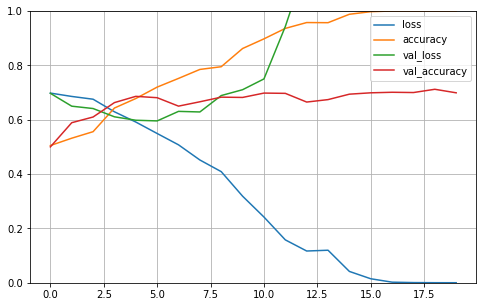

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
## from the above graph it is evident that the validation loss increased from a certain point but the training loss continues to go down 
## this represents a clear case of overfitting 

In [17]:
## save the model 

model.save('Image_classification_CNN.h5')

## Data augmentation

In [14]:
train_datagen_1=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen_1=ImageDataGenerator(rescale=1./255)

train_generator_1=train_datagen_1.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator_1=test_datagen_1.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model1=keras.Sequential()

model1.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model1.add(keras.layers.MaxPool2D((2,2)))

model1.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D((2,2)))

model1.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D((2,2)))

model1.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D((2,2)))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(512,activation='relu'))
model1.add(keras.layers.Dense(1,activation='sigmoid'))



model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history=model1.fit(
    train_generator_1,
    steps_per_epoch = 100,
    epochs=100,
    validation_data=validation_generator_1,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 32s 302ms/step - loss: 0.7001 - accuracy: 0.5180 - val_loss: 0.6918 - val_accuracy: 0.5010
Epoch 2/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6931 - accuracy: 0.5065 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6825 - accuracy: 0.5550 - val_loss: 0.6881 - val_accuracy: 0.5230
Epoch 4/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6783 - accuracy: 0.5590 - val_loss: 0.6626 - val_accuracy: 0.5720
Epoch 5/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6571 - accuracy: 0.5890 - val_loss: 0.6610 - val_accuracy: 0.5810
Epoch 6/100
100/100 [==============================] - 31s 311ms/step - loss: 0.6737 - accuracy: 0.5855 - val_loss: 0.6524 - val_accuracy: 0.6050
Epoch 7/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6556 - accuracy: 0.5885 - val_loss: 0.6792 -

Epoch 57/100
100/100 [==============================] - 29s 286ms/step - loss: 0.4045 - accuracy: 0.8220 - val_loss: 0.4194 - val_accuracy: 0.8110
Epoch 58/100
100/100 [==============================] - 29s 286ms/step - loss: 0.4174 - accuracy: 0.8170 - val_loss: 0.4154 - val_accuracy: 0.8190
Epoch 59/100
100/100 [==============================] - 29s 285ms/step - loss: 0.4060 - accuracy: 0.8220 - val_loss: 0.4288 - val_accuracy: 0.8070
Epoch 60/100
100/100 [==============================] - 29s 286ms/step - loss: 0.4023 - accuracy: 0.8205 - val_loss: 0.4206 - val_accuracy: 0.8240
Epoch 61/100
100/100 [==============================] - 29s 288ms/step - loss: 0.4266 - accuracy: 0.8060 - val_loss: 0.4052 - val_accuracy: 0.8100
Epoch 62/100
100/100 [==============================] - 29s 288ms/step - loss: 0.4082 - accuracy: 0.8115 - val_loss: 0.4729 - val_accuracy: 0.7610
Epoch 63/100
100/100 [==============================] - 29s 289ms/step - loss: 0.4288 - accuracy: 0.8090 - val_loss: 0

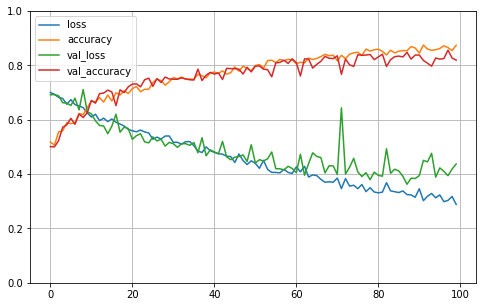

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
## conclusion: we can say that by performing the "data augmentation" we see that the validation loss decreases considerably 

In [22]:
model1.save('data_augmented_model.h5')

In [23]:
%pwd

'C:\\Users\\ATHCHAND\\Tensorflow pracs'

## Transfer learning using VGG16

In [24]:
from tensorflow.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',
                include_top=False,##we only want to use "conv" base
                input_shape=(150,150,3))

58892288/58889256 [==============================] - 14s 0us/step


In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [27]:
model_3=keras.Sequential()

model_3.add(conv_base)
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(256,activation='relu'))
model_3.add(keras.layers.Dense(1,activation='sigmoid'))



In [28]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
## we can pause the conv layer by writing
## conv_base.trainable=False  to make our weight updations and reduce the no of params and time 
## but we choose to use the VGG model weights

In [30]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('CNN_VGG_model-{epoch:02d}.h5') ##save model at each epoch 

In [ ]:
history_VGG=model_3.fit(
    train_generator_1,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator_1,
    validation_steps=50,
    callbacks=[checkpoint_cb]
)

In [ ]:
pd.DataFrame(history_VGG.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
## testing the test dataset

In [33]:
test_generator_1=test_datagen_1.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
model_3.evaluate(test_generator_1,steps=50)